# Explanation 
Load the dataset into a Pandas Data Frame.
Perform exploratory data analysis (EDA) to understand the distribution of variables, identify potential relationships, and detect any outliers or missing values.

Formulate your hypothesis based on the research question you want to address. For example, you might want to test if there is a significant difference in cholesterol levels between patients with and without heart disease.

Select an appropriate statistical test based on the nature of your hypothesis and the type of variables involved. For example, you might use an independent t-test to compare cholesterol levels between the two groups.

Conduct the hypothesis test using a suitable statistical method or library, such as SciPy or StatsModels, and interpret the results. Determine if the difference between groups is statistically significant.

Calculate confidence intervals for relevant variables to estimate the range within which the true population parameter lies. This will provide additional insights into the precision of your estimates.

Visualize the results of your hypothesis tests and confidence intervals, using plots or graphs to present the findings effectively.

# Hypothesis Testing and Confidence Intervals

In [1]:
import numpy as np

In [2]:
import pandas as pd

### Load the dataset into a Pandas Data Frame.

In [3]:
df = pd.read_csv("C:/Users/Syed Muqtasid Ali/Downloads/Documents/heart_cleveland_upload.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


### Perform exploratory data analysis (EDA) to understand the distribution of variables, identify potential relationships, and detect any outliers or missing values.

In [5]:
df.shape

(297, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [7]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [8]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [10]:
#counting values of target column 
df["condition"].value_counts()

0    160
1    137
Name: condition, dtype: int64

In [11]:
import matplotlib.pyplot as plt

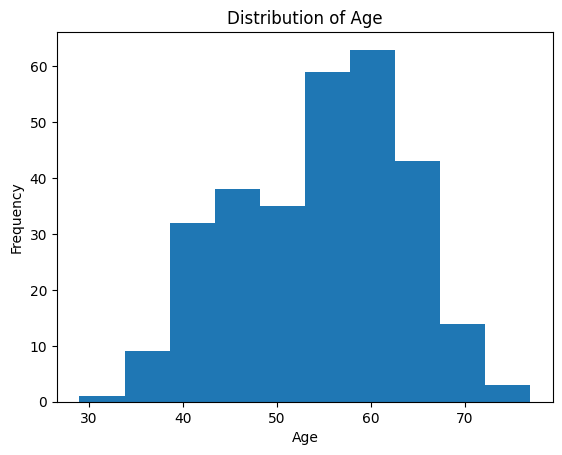

In [12]:
#plot a histogram of distribution of Age Column
plt.hist(df["age"],bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

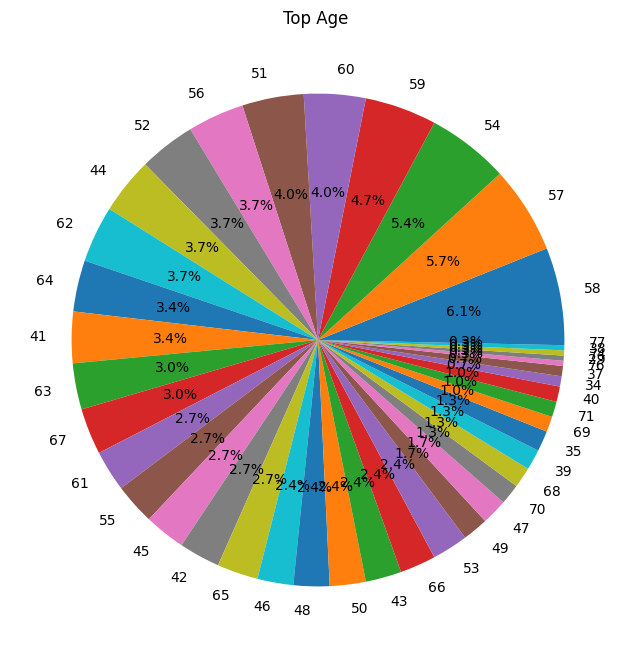

In [69]:
#pie chart
#top age 
age_count = df["age"].value_counts() # counting values of age through age column
plt.figure(figsize=(8,8))
plt.pie(age_count, labels=age_count.index, autopct='%1.1f%%')
plt.title('Top Age ')
plt.show()

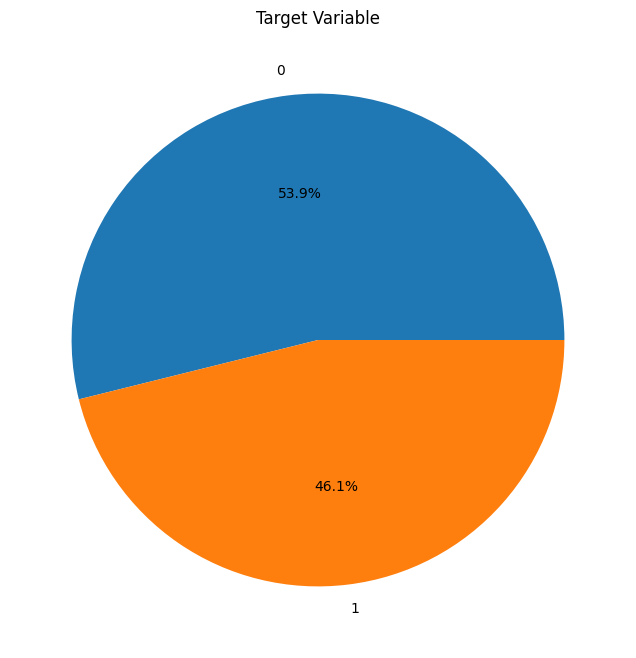

In [14]:
condition_count = df["condition"].value_counts() #pie chart for target variable 
plt.figure(figsize=(8,8))
plt.pie(condition_count,labels = condition_count.index, autopct='%1.1f%%')
plt.title("Target Variable")
plt.show()

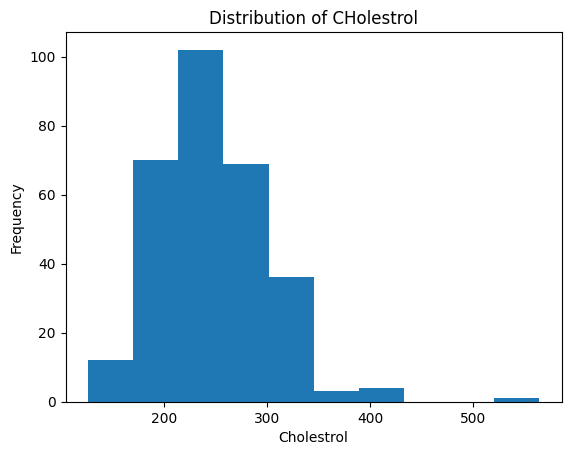

In [15]:
# Distribution of Cholestrol
plt.hist(df["chol"],bins=10)
plt.xlabel("Cholestrol")
plt.ylabel("Frequency")
plt.title("Distribution of CHolestrol")
plt.show()

### Formulate your hypothesis based on the research question you want to address. For example, you might want to test if there is a significant difference in cholesterol levels between patients with and without heart disease.

In [16]:
import scipy.stats as stats

In [17]:
cholestrol_with_heart_disease= df[df["condition"]==1]["chol"] #cheking cholestrol with heart disease
cholestrol_without_heart_disease = df[df["condition"]==0]["chol"]#cheking cholestrol without heart disease
                                  

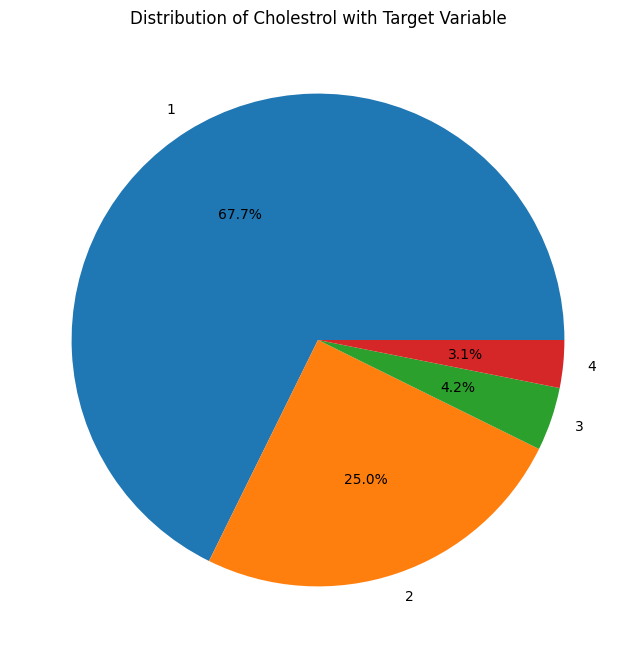

In [34]:
#PLotting cholestrol with heart disease 
cholestrol_with_heart_disease= cholestrol_with_heart_disease.value_counts() #count values function
plt.figure(figsize=(8,8))
plt.pie(cholestrol_with_heart_disease,labels=cholestrol_with_heart_disease.index,autopct='%1.1f%%') #pie chart 
plt.title("Distribution of Cholestrol with Target Variable")
plt.show()

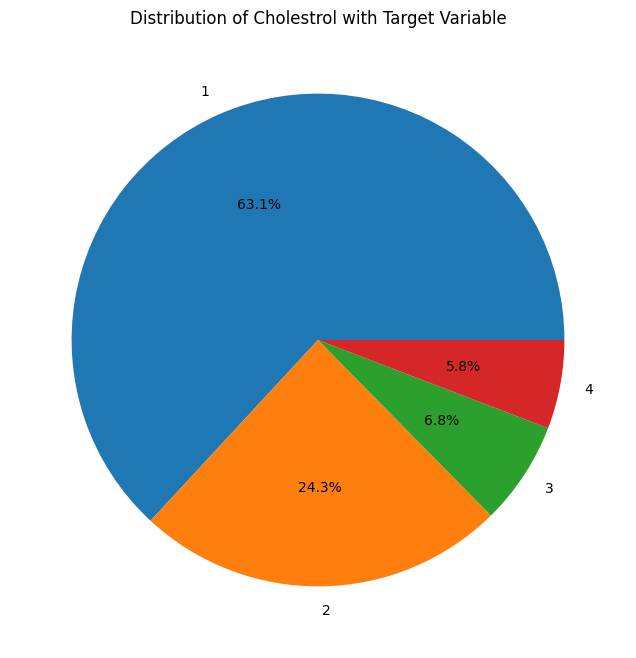

In [35]:
#plotting pie chart of cholestrol without heart disease
cholestrol_without_heart_disease= cholestrol_without_heart_disease.value_counts() #counting values function
plt.figure(figsize=(8,8))
plt.pie(cholestrol_without_heart_disease,labels=cholestrol_without_heart_disease.index,autopct='%1.1f%%')
plt.title("Distribution of Cholestrol with Target Variable")
plt.show()

Select an appropriate statistical test based on the nature of your hypothesis and the type of variables involved. For example, you might use an independent t-test to compare cholesterol levels between the two groups.

# Statistical Method

In [36]:
t_statistic, p_value = stats.ttest_ind(cholestrol_with_heart_disease, cholestrol_without_heart_disease)


In [37]:
print("Two-sample t-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Two-sample t-test results:
t-statistic: -0.08745673783515809
p-value: 0.933154273178992


# Significance Level

In [38]:
# Interpret the results
alpha = 0.05  # significance level

if p_value < alpha:
    print("The difference in cholesterol levels between the two groups is statistically significant.")
else:
    print("The difference in cholesterol levels between the two groups is not statistically significant.")

The difference in cholesterol levels between the two groups is not statistically significant.


Calculate confidence intervals for relevant variables to estimate the range within which the true population parameter lies. This will provide additional insights into the precision of your estimates.
 
# Confidence Intervals for Cholesterol

In [39]:
import statsmodels.api as sm

In [62]:
# Calculate the confidence intervals for the mean cholesterol levels
ci_with_cholestrol_hd = sm.stats.DescrStatsW(cholestrol_with_heart_disease).tconfint_mean()
ci_without_cholestrol_hd = sm.stats.DescrStatsW(cholestrol_without_heart_disease).tconfint_mean()


In [65]:
# Print the confidence intervals
print("Confidence Intervals for Mean Cholesterol Levels:")
print("Patients with Heart Disease:", ci_with_hd)
print("Patients without Heart Disease:", ci_without_hd)

Confidence Intervals for Mean Cholesterol Levels:
Patients with Heart Disease: (-22.136325559635424, 70.13632555963542)
Patients without Heart Disease: (-18.143441927065773, 69.64344192706577)


Visualize the results of your hypothesis tests and confidence intervals, using plots or graphs to present the findings effectively.
# Visualize The Results 

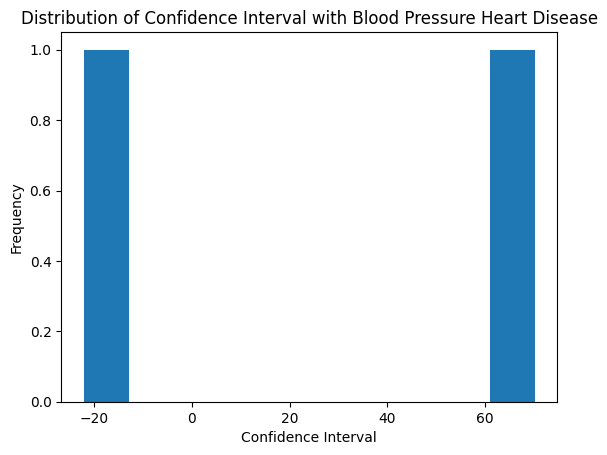

In [66]:
plt.hist(ci_with_cholestrol_hd,bins=10)
plt.xlabel("Confidence Interval")
plt.ylabel("Frequency")
plt.title("Distribution of Confidence Interval with Blood Pressure Heart Disease")
plt.show()

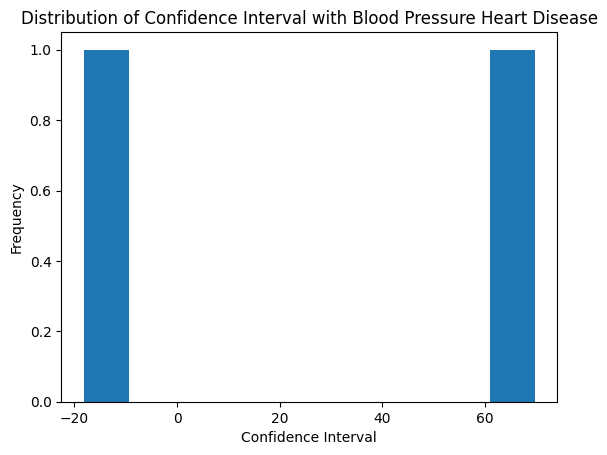

In [67]:
plt.hist(ci_without_cholestrol_hd,bins=10)
plt.xlabel("Confidence Interval")
plt.ylabel("Frequency")
plt.title("Distribution of Confidence Interval with Blood Pressure Heart Disease")
plt.show()

# Formulate Hypothesis Based on Blood Pressure

In [42]:
blood_pressure_with_heart_disease= df[df["condition"]==1]["trestbps"]
blood_pressure_without_heart_disease = df[df["condition"]==0]["trestbps"]

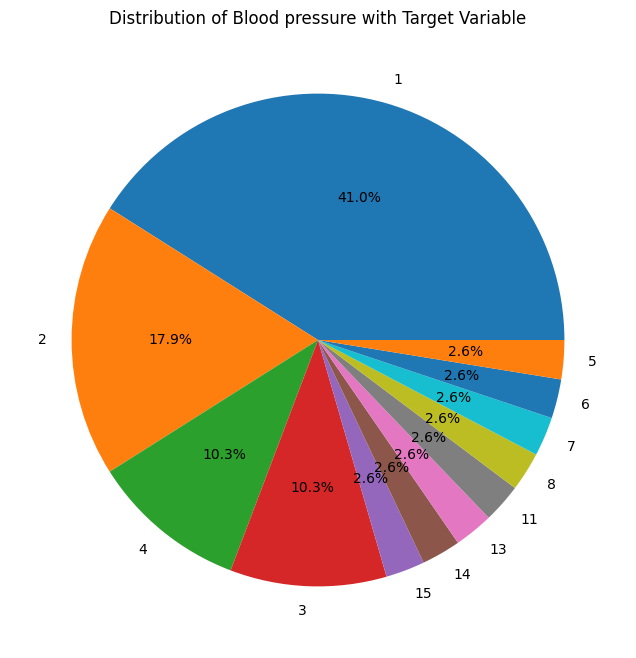

In [46]:
blood_pressure_with_heart_disease= blood_pressure_with_heart_disease.value_counts()
plt.figure(figsize=(8,8))
plt.pie(blood_pressure_with_heart_disease,labels=blood_pressure_with_heart_disease.index,autopct='%1.1f%%')
plt.title("Distribution of Blood pressure with Target Variable")
plt.show()

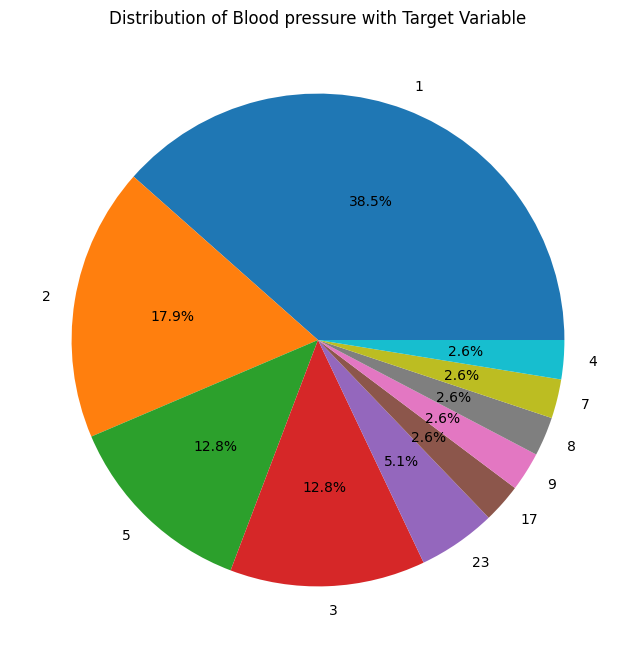

In [45]:
blood_pressure_without_heart_disease= blood_pressure_without_heart_disease.value_counts()
plt.figure(figsize=(8,8))
plt.pie(blood_pressure_without_heart_disease,labels=blood_pressure_without_heart_disease.index,autopct='%1.1f%%')
plt.title("Distribution of Blood pressure with Target Variable")
plt.show()

 # Statistical Test Based On Blood Pressure With and Wthout Heart Disease

In [47]:
t_statistic, p_value = stats.ttest_ind(blood_pressure_with_heart_disease, blood_pressure_without_heart_disease)

In [48]:
print("Two-sample t-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Two-sample t-test results:
t-statistic: -0.3398126720900986
p-value: 0.737540327119837


In [49]:
# Interpret the results
alpha = 0.9 # significance level

if p_value < alpha:
    print("The difference in Blood Pressure levels between the two groups is statistically significant.")
else:
    print("The difference in Blood Pressure levels between the two groups is not statistically significant.")

The difference in Blood Pressure levels between the two groups is statistically significant.


In [50]:
# Calculate the confidence intervals for the mean cholesterol levels
ci_with_blood_pressure_hd = sm.stats.DescrStatsW(blood_pressure_with_heart_disease).tconfint_mean()
ci_without_blood_pressure_hd = sm.stats.DescrStatsW(blood_pressure_without_heart_disease).tconfint_mean()

In [51]:
# Print the confidence intervals
print("Confidence Intervals for Mean Blood Pressure Levels:")
print("Patients with Heart Disease:", ci_with_blood_pressure_hd )
print("Patients without Heart Disease:", ci_without_blood_pressure_hd )

Confidence Intervals for Mean Blood Pressure Levels:
Patients with Heart Disease: (0.4198642003777002, 6.080135799622299)
Patients without Heart Disease: (0.6928386993838069, 7.107161300616193)


# Visualize the Results 

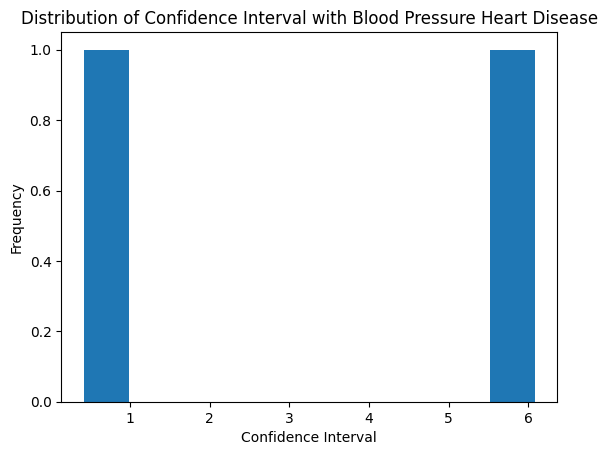

In [60]:
plt.hist(ci_with_blood_pressure_hd,bins=10)
plt.xlabel("Confidence Interval")
plt.ylabel("Frequency")
plt.title("Distribution of Confidence Interval with Blood Pressure Heart Disease")
plt.show()

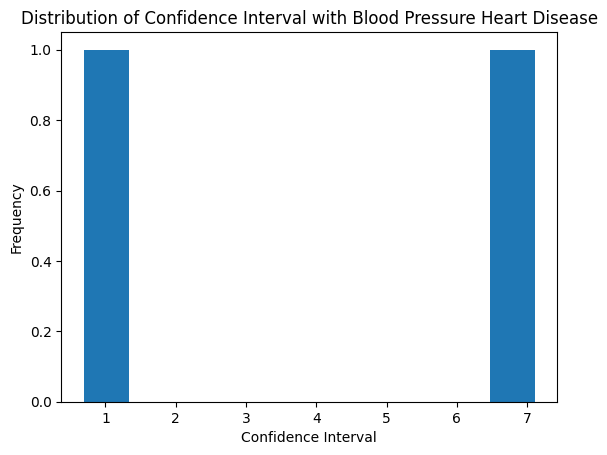

In [61]:
plt.hist(ci_without_blood_pressure_hd,bins=10)
plt.xlabel("Confidence Interval")
plt.ylabel("Frequency")
plt.title("Distribution of Confidence Interval with Blood Pressure Heart Disease")
plt.show()